In [1]:
from dotblotr.image import quantify_blot_array
from dotblotr.viz import plot_value

In [2]:
im_path = './test_blot.tif'
blot_config_path = '../configs/384_tiny_config.json'
assay_config_path = '../configs/assay_config_anti-yo1.csv'

assay_results = quantify_blot_array(
    im_path=im_path,
    strip_id='test_blot',
    array_config_path=blot_config_path,
    assay_config_path=assay_config_path
)

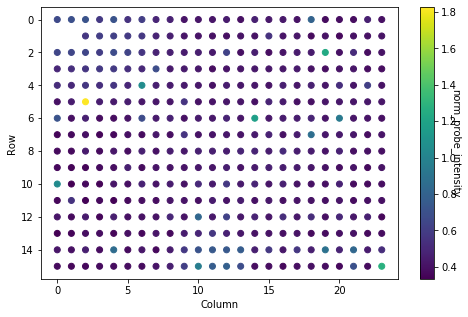

In [3]:
# Plot the normalized probe intensity as a colormap on the blot array
plot_value(assay_results, 'norm_probe_intensity');

In [4]:
# Print out the first 5 entries of the results table 
assay_results.head()

,assay_id,strip_id,dot_name,source_plate_id,source_plate_row,source_plate_column,exp_group,zscore_threshold,blob_label,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,positive_threshold,pos_hit
0,assay_config_anti-yo1.csv,test_blot,A1,Anti-Yo_1,A,1,neg,3,12.0,0.0,0.0,126.676568,161.155116,92.891089,303.0,62.082508,0.668337,0.933781,False
1,assay_config_anti-yo1.csv,test_blot,A2,Anti-Yo_1,A,2,neg,3,13.0,0.0,1.0,200.896552,160.773946,87.804598,261.0,61.429119,0.699612,0.933781,False
2,assay_config_anti-yo1.csv,test_blot,A3,Anti-Yo_1,A,3,neg,3,21.0,0.0,2.0,277.382022,166.370787,83.820225,267.0,60.254682,0.718856,0.933781,False
3,assay_config_anti-yo1.csv,test_blot,A4,Anti-Yo_1,A,4,exp,3,2.0,0.0,3.0,346.685969,158.305122,122.008909,449.0,71.394209,0.585156,0.933781,False
4,assay_config_anti-yo1.csv,test_blot,A5,Anti-Yo_1,A,5,neg,3,22.0,0.0,4.0,431.397380,166.183406,79.305677,229.0,56.842795,0.716756,0.933781,False


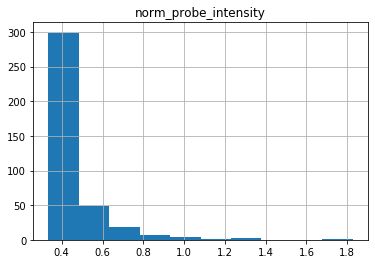

In [5]:
# Plot a histogram of the normalized probe intensities
assay_results.hist('norm_probe_intensity');

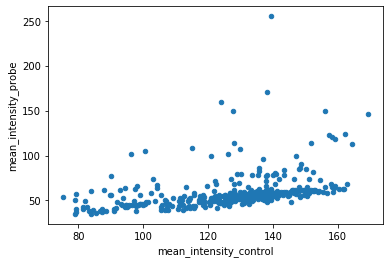

In [6]:
# Plot a scatter of the probe intensity vs. control intensity
assay_results.plot.scatter(x='mean_intensity_control', y='mean_intensity_probe')

In [7]:
# List the wells with a positive hit
assay_results.loc[assay_results['pos_hit']]

,assay_id,strip_id,dot_name,source_plate_id,source_plate_row,source_plate_column,exp_group,zscore_threshold,blob_label,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,positive_threshold,pos_hit
65,assay_config_anti-yo1.csv,test_blot,C20,Anti-Yo_1,C,20,exp,3,48.0,2.0,19.0,1564.478424,304.782364,138.135084,533.0,170.454034,1.233966,0.933781,True
100,assay_config_anti-yo1.csv,test_blot,E7,Anti-Yo_1,E,7,exp,3,100.0,4.0,6.0,579.457213,458.951100,96.239609,409.0,101.400978,1.053630,0.933781,True
120,assay_config_anti-yo1.csv,test_blot,F3,Anti-Yo_1,F,3,exp,3,131.0,5.0,2.0,274.911927,535.546789,139.539450,545.0,255.000000,1.827440,0.933781,True
156,assay_config_anti-yo1.csv,test_blot,G15,Anti-Yo_1,G,15,exp,3,157.0,6.0,14.0,1181.971717,609.917172,127.715152,495.0,149.527273,1.170787,0.933781,True
162,assay_config_anti-yo1.csv,test_blot,G21,Anti-Yo_1,G,21,exp,3,143.0,6.0,20.0,1638.470588,599.284314,114.958333,408.0,107.933824,0.938895,0.933781,True
238,assay_config_anti-yo1.csv,test_blot,K1,Anti-Yo_1,K,1,exp,3,252.0,10.0,0.0,132.194379,905.384075,100.529274,427.0,105.442623,1.048875,0.933781,True
368,assay_config_anti-yo1.csv,test_blot,P11,Anti-Yo_1,P,11,exp,3,362.0,15.0,10.0,889.536913,1270.159396,156.151007,596.0,149.813758,0.959416,0.933781,True
381,assay_config_anti-yo1.csv,test_blot,P24,Anti-Yo_1,P,24,exp,3,376.0,15.0,23.0,1866.325482,1273.659529,123.980728,467.0,159.295503,1.284841,0.933781,True


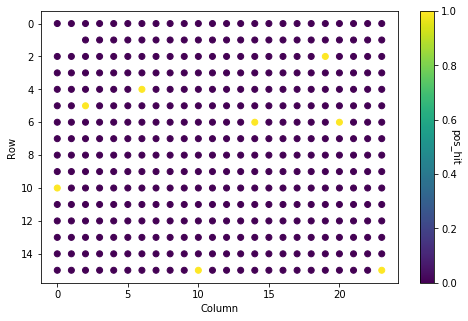

In [8]:
# Plot just the positive hits
plot_value(assay_results, 'pos_hit');